In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
train.shape

(891, 12)

In [7]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [13]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train['Embarked'].fillna('S',inplace=True)

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [16]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [17]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [19]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [20]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [25]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\zee78\AppData\Local\Temp\ipykernel_17216\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [26]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\zee78\AppData\Local\Temp\ipykernel_17216\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [28]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [29]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [30]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [31]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\zee78\AppData\Local\Temp\ipykernel_17216\3826302481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
C:\Users\zee78\AppData\Local\Temp\ipykernel_17216\3826302481.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1]

<Axes: xlabel='Age', ylabel='Density'>

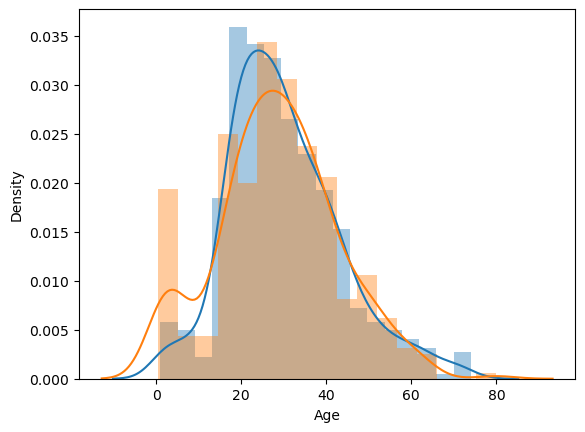

In [33]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\zee78\AppData\Local\Temp\ipykernel_17216\2626582821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
C:\Users\zee78\AppData\Local\Temp\ipykernel_17216\2626582821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==

<Axes: xlabel='Fare', ylabel='Density'>

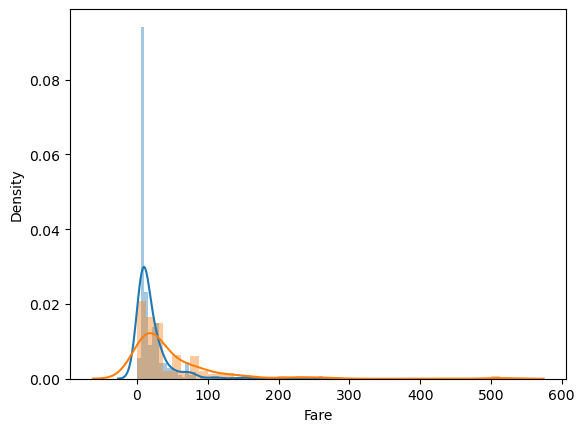

In [34]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [35]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [40]:
train['family']=train['SibSp']+train['Parch']+1

In [41]:
test['family']=test['SibSp']+test['Parch']+1

In [42]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [39]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [43]:
def cal(number):
    if number==1:
        return 'Alone'
    elif number>1 and number<5:
        return 'Medium'
    else:
        return 'Large'

In [44]:
train['family_size']=train['family'].apply(cal)

In [45]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium


In [46]:
test['family_size']=test['family'].apply(cal)

In [47]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,Medium


In [48]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [49]:
train.shape

(891, 9)

In [50]:
test.shape

(418, 8)

In [112]:
passengerID=test['PassengerId'].values

KeyError: 'PassengerId'

In [52]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [53]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [55]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [56]:
train.shape

(891, 10)

In [57]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [59]:
X=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [61]:
from sklearn.model_selection import train_test_X=train.iloc[:,1:].values
y=train.iloc[:,0].valuessplit
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [87]:
#from sklearn.tree import DecisionTreeClassifier
#classifier=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [88]:
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [89]:
y_pred=classifier.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7932960893854749

In [91]:
xf=test.iloc[:,:].values

In [92]:
y_final=classifier.predict(xf)

In [93]:
y_final.shape

(418,)

In [94]:
final=pd.DataFrame()

In [95]:
final

""


In [96]:
final['passengerID']=passengerID

In [104]:
final['Survived']=y_final

In [105]:
final

,passengerID,servived,Servived,Survived
0,892,0,0,0
1,893,0,0,0
2,894,0,0,0
3,895,1,1,1
4,896,1,1,1
...,...,...,...,...
413,1305,0,0,0
414,1306,1,1,1
415,1307,0,0,0
416,1308,0,0,0


In [107]:
final.to_csv('Submition_3.csv',index=False)

In [108]:
f=pd.read_csv('Submition_3.csv')

In [109]:
f

,passengerID,servived,Servived,Survived
0,892,0,0,0
1,893,0,0,0
2,894,0,0,0
3,895,1,1,1
4,896,1,1,1
...,...,...,...,...
413,1305,0,0,0
414,1306,1,1,1
415,1307,0,0,0
416,1308,0,0,0
